In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys  

import numpy as np
import matplotlib

reload(sys)  
sys.setdefaultencoding('utf8')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

sns.set_style("whitegrid")

data = pd.read_csv('salary.csv')

data.columns = ['role', 'salary', 'years']
data['role'] = data.role.str.lower()
data['years'] = data.years.apply(pd.to_numeric)

data.head()


(0, 210000)

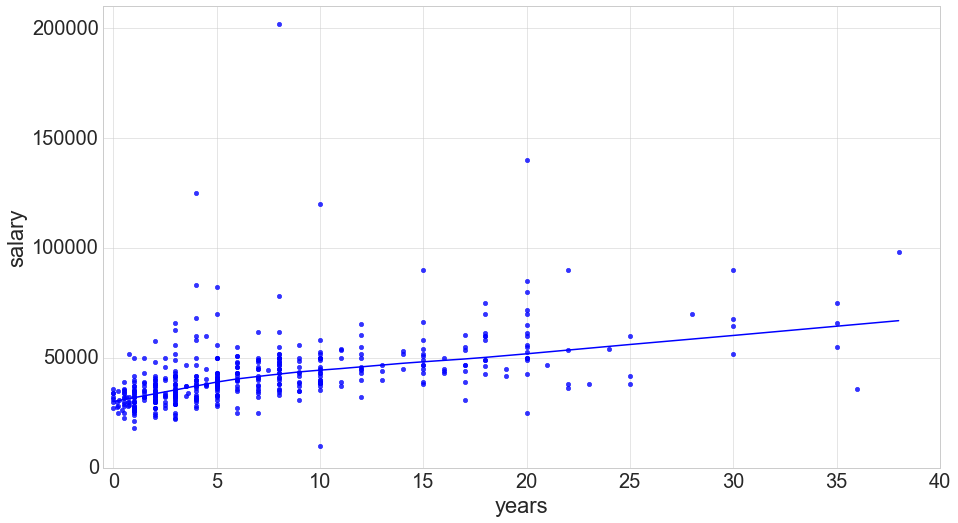

In [56]:
fs = (15, 8.27)
fig, ax = plt.subplots(figsize=fs)
sns.regplot("years", "salary", data=data, lowess=True, ax=ax)
ax.set_xlim([-0.5, 40])
ax.set_ylim([0, 210000])


(0, 100000)

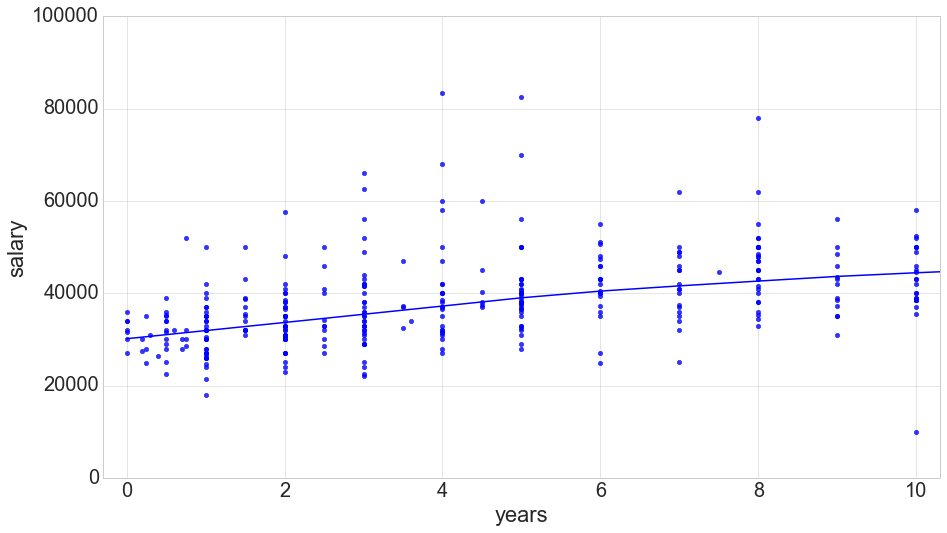

In [57]:
fs = (15, 8.27)
fig, ax = plt.subplots(figsize=fs)
sns.regplot("years", "salary", data=data, lowess=True, ax=ax)
ax.set_xlim([-0.3, 10.3])
ax.set_ylim([0, 100000])
#ax.set_yscale('log')

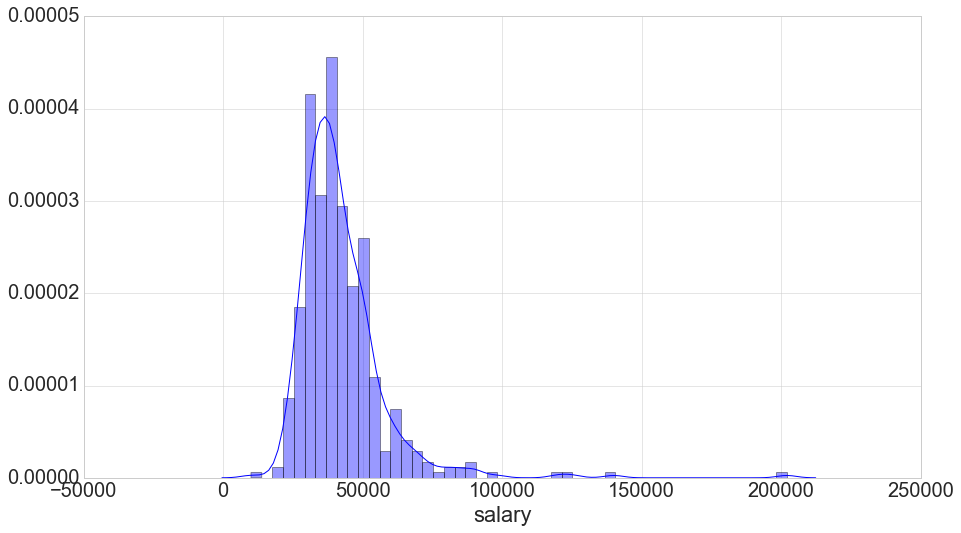

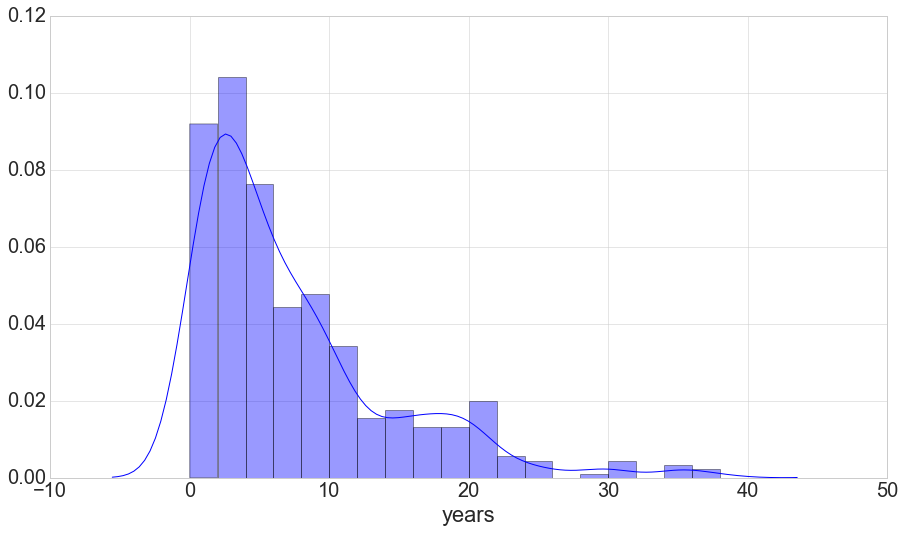

In [72]:
fs = (15, 8.27)
fig, ax = plt.subplots(figsize=fs)
sns.distplot(data.salary)
fs = (15, 8.27)
fig, ax = plt.subplots(figsize=fs)
sns.distplot(data.years)

In [59]:
translationer = {'front end utvecklare': 'frontendutvecklare',
'frontend utvecklare': 'frontendutvecklare',
'software utvecklare': 'utvecklare'}
def trans(x):
    if x in translationer:
        return translationer[x]
    return x

data.role = data.role.astype('string').map(lambda x: x.replace('developer', 'utvecklare')).map(trans)
role_salary = data.groupby('role').salary.describe()

role_salary.sort_values('count', ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
role,,,,,,,,
systemutvecklare,49.0,35533.938776,7414.713931,24000.0,32000.0,33000.0,39000.0,61250.0
utvecklare,39.0,48230.769231,29933.849471,27000.0,35100.0,42000.0,48250.0,202000.0
frontendutvecklare,29.0,35116.551724,8808.637107,23000.0,29000.0,33000.0,37200.0,57680.0
webbutvecklare,22.0,31801.363636,8694.833877,10000.0,26625.0,31500.0,36750.0,49000.0
konsult,11.0,47163.636364,16420.857026,25000.0,33250.0,50000.0,60000.0,72000.0
senior utvecklare,11.0,46909.090909,10690.692639,35000.0,40500.0,47000.0,49500.0,75000.0
lead utvecklare,9.0,47333.333333,12654.050735,35000.0,38500.0,40000.0,58000.0,68000.0
programmerare,8.0,45662.500000,13077.673177,28000.0,37600.0,45250.0,51000.0,70000.0
data scientist,8.0,45425.000000,8199.782227,35300.0,40750.0,43500.0,50575.0,60000.0


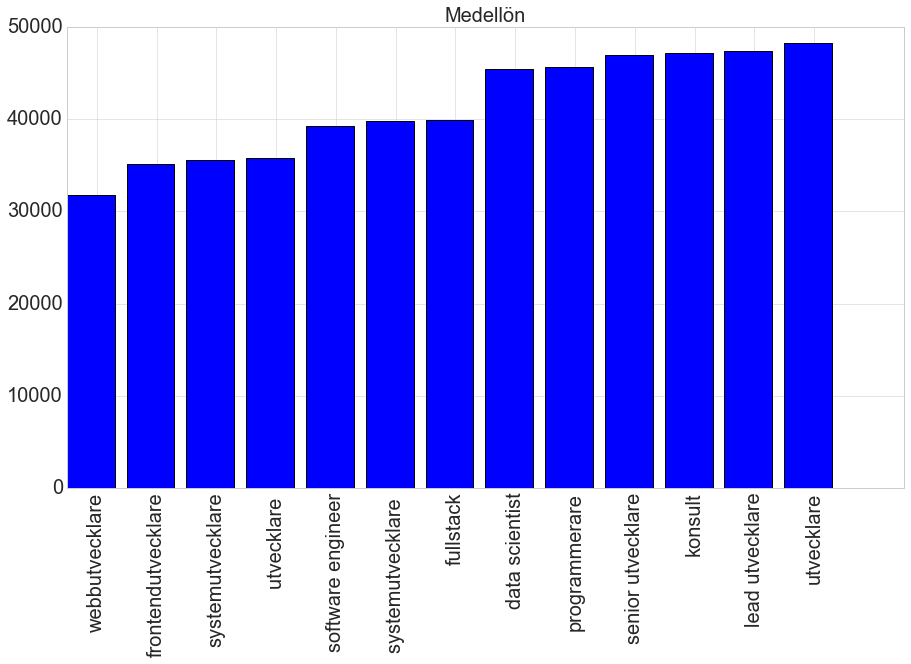

In [63]:
role_salary = data.groupby('role').salary.describe()
role_salary = role_salary.loc[role_salary['count'] >= 5].sort_values('mean')

fs = (15, 8.27)
fig, ax = plt.subplots(figsize=fs)
ax.bar(range(len(role_salary)), role_salary['mean'])
plt.xticks(0.5 + np.arange(len(role_salary)), role_salary.index, rotation='vertical')
plt.title('Medellön', fontsize=20)

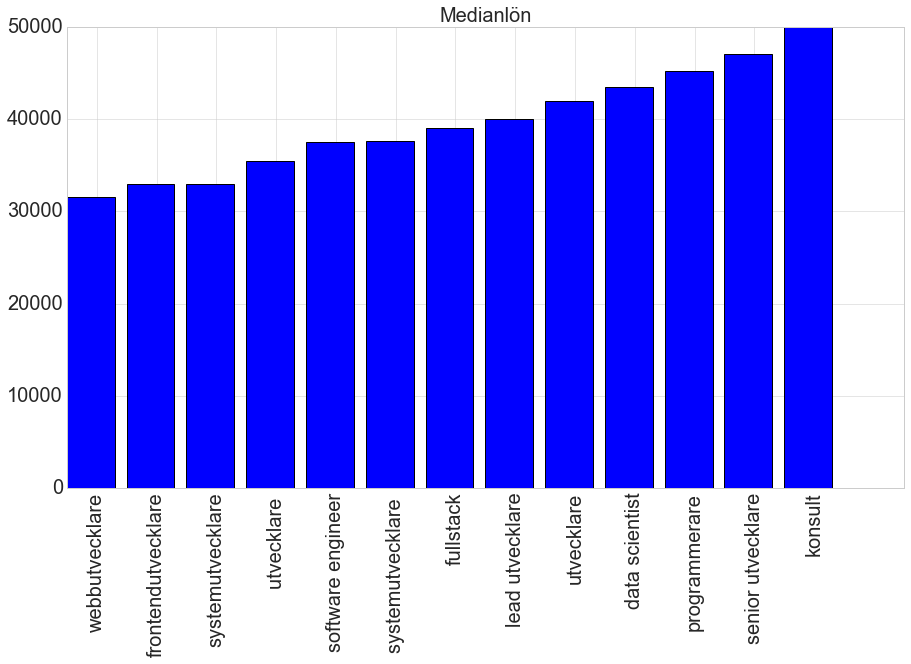

In [62]:
role_salary = data.groupby('role').salary.describe()
role_salary = role_salary.loc[role_salary['count'] >= 5].sort_values('50%')

fs = (15, 8.27)
fig, ax = plt.subplots(figsize=fs)
ax.bar(range(len(role_salary)), role_salary['50%'])
plt.xticks(0.5 + np.arange(len(role_salary)), role_salary.index, rotation='vertical')
plt.title('Medianlön', fontsize=20)

In [7]:
role_salary.count

<bound method DataFrame.count of                     count          mean           std      min      25%  \
role                                                                      
data scientist        8.0  45425.000000   8199.782227  35300.0  40750.0   
frontendutvecklare   29.0  35116.551724   8808.637107  23000.0  29000.0   
fullstack             6.0  39916.666667  12093.042077  29000.0  32000.0   
konsult              11.0  47163.636364  16420.857026  25000.0  33250.0   
lead utvecklare       9.0  47333.333333  12654.050735  35000.0  38500.0   
programmerare         8.0  45662.500000  13077.673177  28000.0  37600.0   
senior utvecklare    11.0  46909.090909  10690.692639  35000.0  40500.0   
software engineer     7.0  39285.714286   8445.201512  30000.0  33000.0   
systemutvecklare     49.0  35533.938776   7414.713931  24000.0  32000.0   
systemutvecklare      8.0  39825.000000   6388.102781  32000.0  37000.0   
utvecklare           39.0  48230.769231  29933.849471  27000.0  351

In [8]:
data.describe()

,salary,years
count,451.000000,451.000000
mean,42294.283814,7.271508
std,15965.936850,7.000876
min,10000.000000,0.000000
25%,33000.000000,2.000000
50%,39000.000000,5.000000
75%,48000.000000,10.000000
max,202000.000000,38.000000


In [9]:
data.years.describe()

count    451.000000
mean       7.271508
std        7.000876
min        0.000000
25%        2.000000
50%        5.000000
75%       10.000000
max       38.000000
Name: years, dtype: float64

In [10]:
data.role.describe()

count                  451
unique                 208
top       systemutvecklare
freq                    49
Name: role, dtype: object

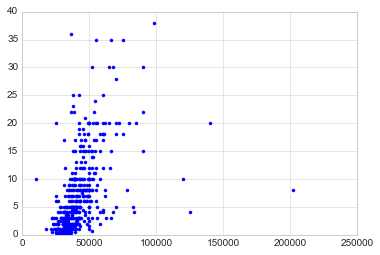

In [11]:
import matplotlib.pyplot as plt
plt.plot(data.salary, data.years, '.')
plt.show()

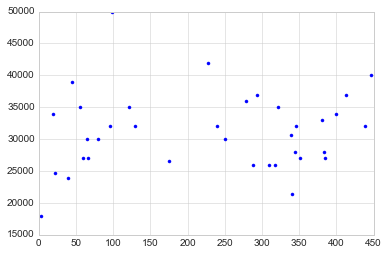

In [12]:
import matplotlib.pyplot as plt
plt.plot(data[data.years == 1].salary, '.')
plt.show()

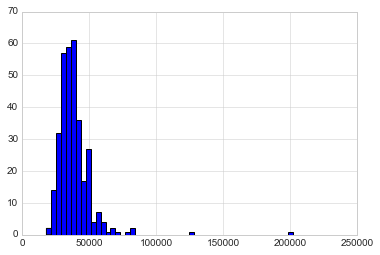

In [13]:
import matplotlib.pyplot as plt
#plt.hist(data[data.years == 1].salary, '.')
n, bins, patches = plt.hist(data[data.years < 10].salary, 50)
plt.show()